In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Data Cleaning**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**Feature Engineering**

In [7]:
Male = pd.get_dummies(df['sex'], drop_first = True)
df = pd.concat([df, Male], axis =1)

In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male
0,19,female,27.900,0,yes,southwest,16884.92400,False
1,18,male,33.770,1,no,southeast,1725.55230,True
2,28,male,33.000,3,no,southeast,4449.46200,True
3,33,male,22.705,0,no,northwest,21984.47061,True
4,32,male,28.880,0,no,northwest,3866.85520,True


In [9]:
Smoker = pd.get_dummies(df['smoker'], drop_first = True)
df = pd.concat([df, Smoker], axis =1)

In [10]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,yes
0,19,female,27.900,0,yes,southwest,16884.92400,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False


In [11]:
df = df.rename(columns = {'yes':'Smoker'})

In [12]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker
0,19,female,27.900,0,yes,southwest,16884.92400,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False


In [13]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

**Exploratory Analysis**

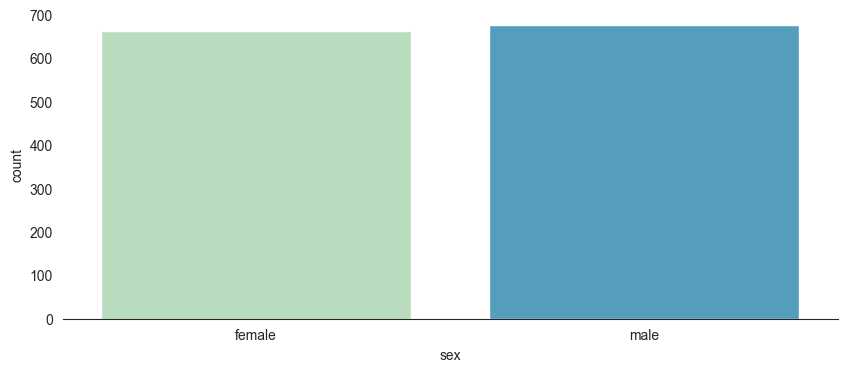

In [18]:
plt.figure(figsize = (10,4))
sns.set_style('white')
sns.countplot(x='sex', data= df, palette = 'GnBu')
sns.despine(left = True)

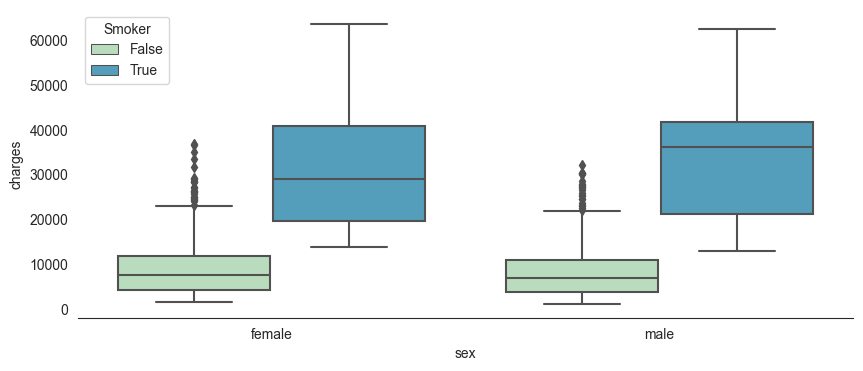

In [20]:
plt.figure(figsize = (10,4))
sns.set_style('white')
sns.boxplot(x='sex', y= 'charges', data = df, palette ='GnBu', hue = 'Smoker')
sns.despine(left = True)

<Axes: xlabel='age', ylabel='charges'>

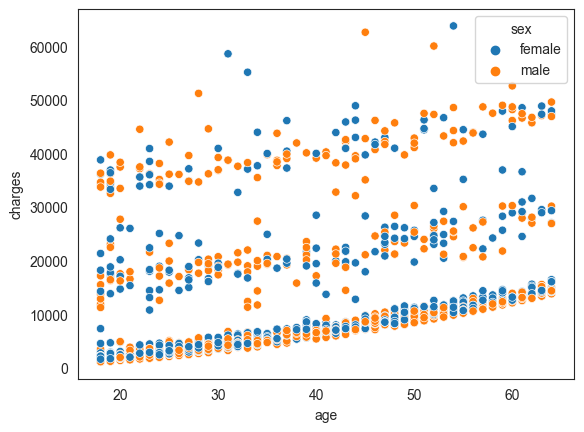

In [21]:
sns.scatterplot(x = 'age', y = 'charges', data =df, hue= 'sex')

<Axes: xlabel='age', ylabel='charges'>

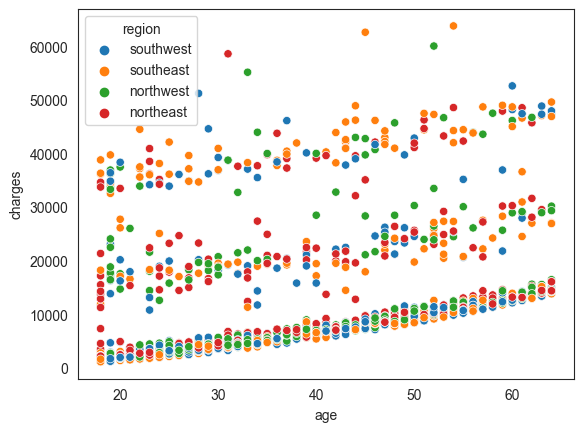

In [22]:
sns.scatterplot(x = 'age', y = 'charges', data =df, hue= 'region')

<Axes: xlabel='age', ylabel='charges'>

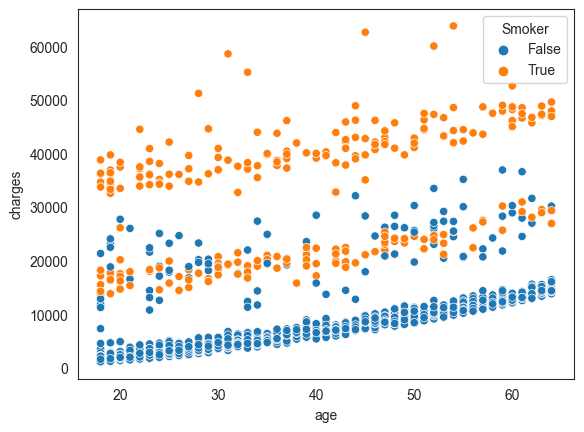

In [23]:
sns.scatterplot(x = 'age', y = 'charges', data =df, hue= 'Smoker')

<Axes: xlabel='bmi', ylabel='charges'>

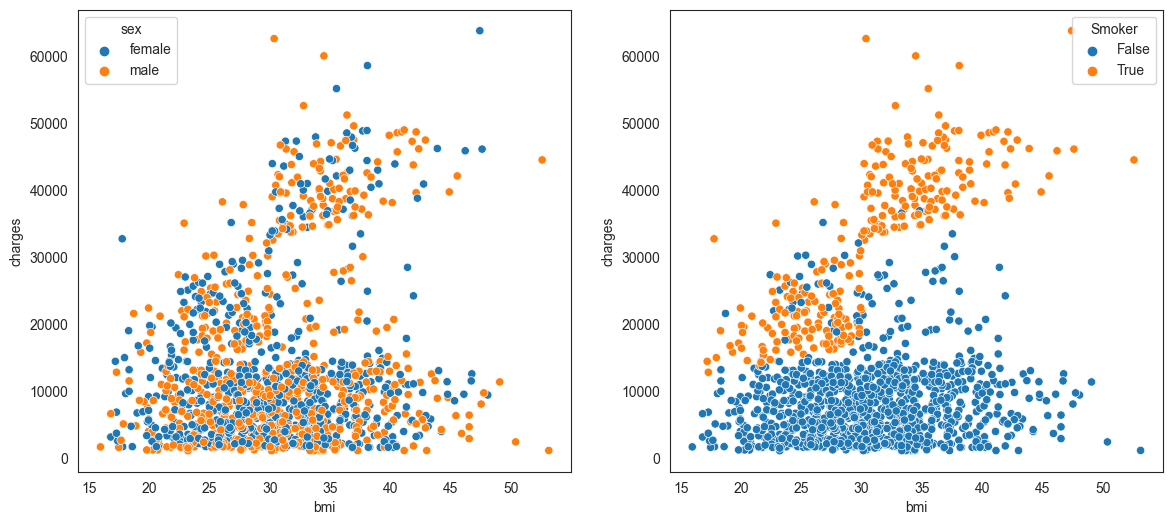

In [24]:
fig, ax = plt.subplots(nrows= 1, ncols = 2, figsize= (14,6))
sns.scatterplot(x = 'bmi', y = 'charges', data =df, hue= 'sex', ax= ax[0])
sns.scatterplot(x = 'bmi', y = 'charges', data =df, hue= 'Smoker', ax = ax[1])

<Axes: xlabel='bmi', ylabel='charges'>

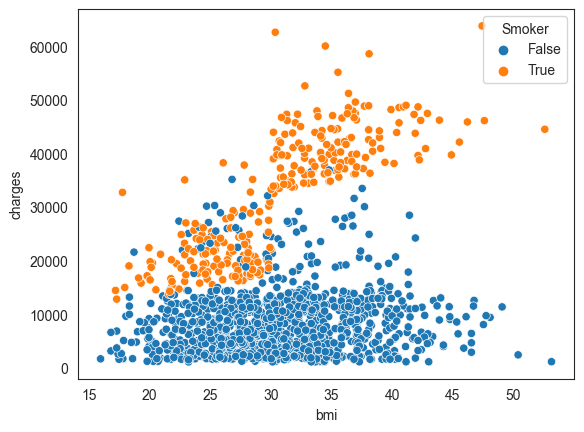

In [25]:
sns.scatterplot(x = 'bmi', y = 'charges', data =df, hue= 'Smoker')

In [26]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker
0,19,female,27.900,0,yes,southwest,16884.92400,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False


In [27]:
df.drop(['sex', 'region', 'smoker'], axis=1, inplace=True)

In [32]:
df.corr()

,age,bmi,children,charges,male,Smoker
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251
male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185
Smoker,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000


<Axes: >

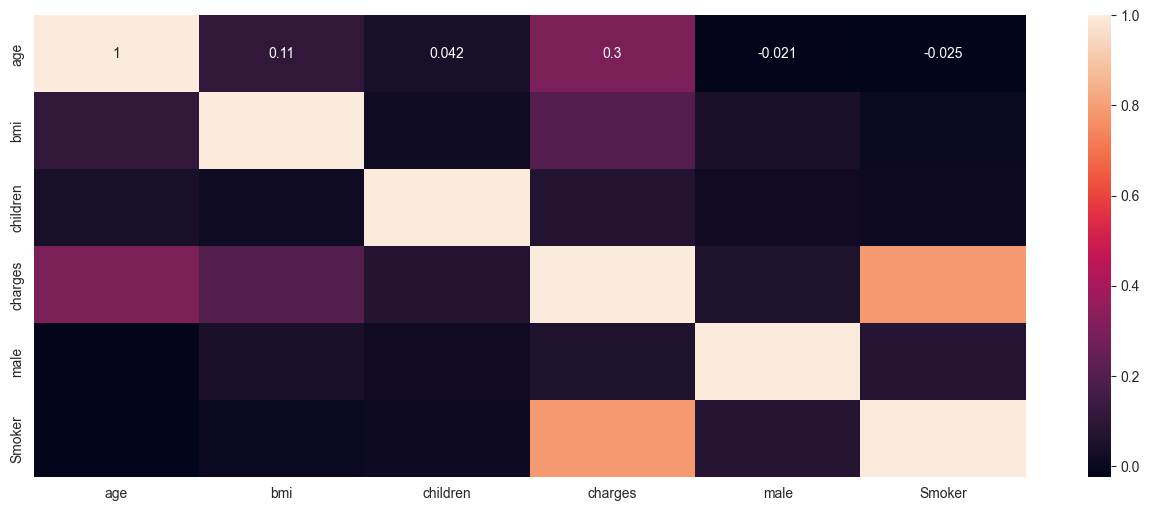

In [28]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(), annot = True)

**Splitting the data**

In [33]:
x = df.drop('charges', axis = 1)
y = df['charges']

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.4)

In [35]:
x_train.shape

(802, 5)

In [36]:
df.head()

,age,bmi,children,charges,male,Smoker
0,19,27.900,0,16884.92400,False,True
1,18,33.770,1,1725.55230,True,False
2,28,33.000,3,4449.46200,True,False
3,33,22.705,0,21984.47061,True,False
4,32,28.880,0,3866.85520,True,False


In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [38]:
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [39]:
scaled_x_train

array([[ 0.23427338, -1.67713111,  0.74993452,  1.03038665,  2.03495102],
       [ 1.07493223,  1.6430274 ,  1.57270811, -0.97050946, -0.49141232],
       [ 0.514493  , -0.44090187, -0.89561264, -0.97050946,  2.03495102],
       ...,
       [ 0.93482243, -0.63837745, -0.89561264, -0.97050946, -0.49141232],
       [ 0.86476752, -1.18745589, -0.89561264, -0.97050946, -0.49141232],
       [-1.1668247 ,  1.95449295, -0.07283906, -0.97050946,  2.03495102]])

**Support vector regression**

In [40]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(scaled_x_train, y_train)

predict = regressor.predict(scaled_x_test)

In [41]:
predict

array([9415.87386883, 9468.75760752, 9388.49705987, 9349.7651787 ,
       9425.7499593 , 9418.61490881, 9446.85214023, 9386.22715809,
       9466.45661113, 9447.22872323, 9339.01302697, 9335.80610116,
       9346.74862214, 9335.54544136, 9395.00424382, 9452.86603546,
       9442.23379102, 9456.37501955, 9333.75748163, 9453.51066277,
       9378.75011931, 9459.88725519, 9480.64146954, 9425.19662623,
       9401.12627706, 9483.24093667, 9377.81786768, 9367.65967794,
       9465.4892191 , 9334.95544042, 9324.73131226, 9402.20283504,
       9344.12573981, 9332.23300139, 9356.0914793 , 9329.88747661,
       9442.29660661, 9341.85192672, 9466.97115772, 9475.17331713,
       9459.80142991, 9448.05171688, 9372.38719067, 9346.46090686,
       9342.04134304, 9445.85960477, 9326.1285306 , 9464.74947183,
       9488.9685709 , 9471.62437188, 9348.297936  , 9415.48707769,
       9418.11153758, 9402.7240423 , 9396.36758738, 9362.84910645,
       9351.3229928 , 9448.36512649, 9478.22614214, 9380.72054

In [42]:
y_test

1106     8988.15875
850     37270.15120
268      7441.05300
1335     1629.83350
1140     9048.02730
           ...     
155      6948.70080
355     24603.04837
299      9249.49520
535      6067.12675
500     36197.69900
Name: charges, Length: 536, dtype: float64

In [43]:
np.mean((y_test - predict)**2)

155262781.28193483